In [49]:
import numpy as np
import os
import pickle
import pprint as pp
import matplotlib.pyplot as plt

In [72]:
CAMPUS_USED_DATA_SET = 454000

In [10]:
def getDataFromFile(filename):
    with open(filename, 'rb') as f:
        x = pickle.load(f)
        print(f'Retreived Data from {filename}')
        return x
def writeDataToFile(data, filename):
    outfile = open(filename,'wb')
    pickle.dump(data,outfile)
    outfile.close()
    print(f'wrote data to {filename}')

def getMinimums(data, windowSize):
    ret = []
    for i in range(0, len(data)-windowSize, windowSize):
        ret.append(np.min(data[i:i+windowSize]))
    return ret

In [11]:
def twoWindow(data, windowSize=16, jump1=80, short=False):
    if len(data)/2 < windowSize:
        print(f'too little data {len(data)} to run twoWindow with window size {windowSize}')
        return 0, [], []
    jumps = []
    flag = 0
    mins = getMinimums(data)
    for i in range(len(mins) - 1):
        if mins[i+1] - mins[i] >= jump1:
            jumps.append(i)
            flag = 1
            if short:
                return flag, mins, jumps
    return flag, mins, jumps            

In [14]:
def threeWindow(data, windowSize=16, jump1=80, jump2=2, short=False):
    if len(data)/3 < windowSize:
        print(f'too little data {len(data)} to run threeWindow with window size {windowSize}')
        return 0, [], [], []
    jumps = [] # index of jumps
    bloats = []
    flag # 0: nothing, 1: contains an suspected attack
    mins = getMinimums(data)
    for i in range(len(mins) - 2):
        if mins[i+1] - mins[i] >= jump1:
            ## see a jump, is it bloat or sustained?
            if abs(mins[i+2] - mins[i+1]) < jump2:
                jumps.append(i)
                flag = 0
                if short:
                    return flag, mins, jumps, bloats
            else:
                bloats.append(i)
    return flag, mins, jumps, bloats

In [24]:
def getCombinedTwoWindowDict(twoWindowDataFull):
    combined = {}
    keys = list(twoWindowDataFull.keys())
    for key in keys:
        tup = (key[0], key[1])
        old = combined.get(tup, [])
        combined[tup] = old + twoWindowDataFull[key]
    return combined
    

In [78]:
def makeTwoWindowConnectionsFlaggedFigure(totalCombinedData):
    keys = sorted(list(totalCombinedData.keys()))
    counts = []
    for key in keys:
        counts.append(len(combined[key]))
    x8 = []
    y8 = []
    x16 = []
    y16 = []
    x24 = []
    y24 = []
    x32 = []
    y32 = []
    tracker = {8:[x8,y8], 16:[x16,y16], 24:[x24,y24], 32:[x32,y32]}
    for i in range(len(keys)):
        windowSize = keys[i][0]
        tracker[windowSize][0].append(keys[i][1])
        tracker[windowSize][1].append(counts[i]/ CAMPUS_USED_DATA_SET * 100 )
    fig, ax = plt.subplots()
    legend = []
    for windowSize in tracker.keys():
        plt.plot(tracker[windowSize][0][7:], tracker[windowSize][1][7:], 'x-')
        legend.append(str(windowSize))
    plt.legend(legend)
    plt.ylabel("\% of connections flagged")
    plt.xlabel("jump size")


In [35]:
directory = '/n/fs/scratch/djubas/twoWindowData/'
fullData = {}
for file in os.scandir(directory):
    data = getDataFromFile(file)
    fullData.update(data)
print(len(fullData))

Retreived Data from <DirEntry 'partialPromisingDictTwoWindow163.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictShort245.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictShort4.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow161.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictShort241.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow167.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow325.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow326.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow80.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictShort2.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow323.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow81.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictShort247.pickle'>
Retreived Data from <DirEntry 'partialPromisingDictTwoWindow86.pickle'>
Retre

In [37]:
combined = getCombinedTwoWindowDict(fullData)

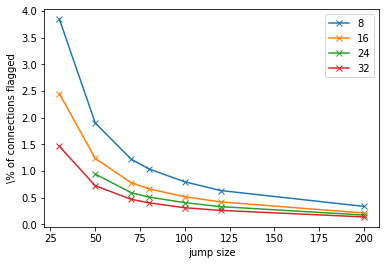

In [79]:
makeTwoWindowConnectionsFlaggedFigure(combined)